# ReinforcementLearning: a)UCB, b)ThompsonSampling

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*In this notebook, the use of two models (**Part A**: UCB and **Part B**: Thompson Sampling) for an online advertising (Click-through rate) case study is demonstrated. Both models are part of Reinforcement Learning (RL) which is a machine learning category that is focused on different types of rewards depending on the actions taken at each step of the learning process. RL algorithms are capable of learning based on their interactions with the environment, where a reward is given each time the correct decision has been taken, in contrast to the supervised ML models where the presence of labels is required.*

*For this demonstration, a dataset has been generated to represent 9 web advertisements of a product on its columns(dataset features) and the user selections (dataset rows). This dataset is based on the assumption that every time a user visits this web page, a different advertisement (ADV1 - ADV9) is displayed. The goal is to apply a Reinforcement Learning algorithm that will try to learn as quickly as possible which advertisement is selected the most (click-through rate) so as to be presented when users visit the site. Initially, the models display different advertisements to each user but as the algorithms gain more information with respect to the users selections (clicks), the advertisement that leads to the highest reward is chosen to be diplayed. The difference between the 'Upper Confidence Bound' (UCB) and the 'Thompson Sampling' algorithm lies in the selection process of the next advertisement that is to be displayed. UCB is a deterministic model, whereas Thompson Sampling is based on random variation (probabilistic model). In order to evaluate their ability to choose the advertisement with the highest conversion rate for different number of samples (users), the total reward for each model is provided, together with plots presenting the number of times each advertisement has been displayed at the web page.*





In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')

In [2]:
# Creating the dataset by generating random values(0 & 1) with different probabilities for each 'Adv' 
# Len.Dataset=20000
np.random.seed(0)
dataset={'Adv1':np.random.choice(2, 20000,p=[0.6,0.4]),
'Adv2':np.random.choice(2, 20000,p=[0.65,0.35]),
'Adv3':np.random.choice(2, 20000,p=[0.44,0.56]),
'Adv4':np.random.choice(2, 20000,p=[0.6,0.4]),
'Adv5':np.random.choice(2, 20000,p=[0.50,0.50]),
'Adv6':np.random.choice(2, 20000,p=[0.49,0.51]),
'Adv7':np.random.choice(2, 20000,p=[0.4,0.6]),
'Adv8':np.random.choice(2, 20000,p=[0.52,0.48]),
'Adv9':np.random.choice(2, 20000,p=[0.47,0.53])}
data=pd.DataFrame(data=dataset)

In [3]:
# Dataset-First ten records
data.head(10)

,Adv1,Adv2,Adv3,Adv4,Adv5,Adv6,Adv7,Adv8,Adv9
0,0,0,0,1,0,1,1,0,0
1,1,0,0,1,0,1,0,1,1
2,1,1,1,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1,0
4,0,1,0,0,1,1,1,1,0
5,1,1,0,1,1,1,1,0,0
6,0,1,0,0,0,0,1,0,0
7,1,1,0,1,0,0,1,1,0
8,1,0,1,1,0,0,0,0,1
9,0,0,0,0,1,1,1,0,1


## UCB

In [4]:
#Upper Confidence Bound Algorithm
def ucb_rewards(Users_Num):
    #Total Number of Advertisements
    Ad_Num=9
    #List of advertisements that are selected by the algorithm based on the user clicks at each step (initially empty)
    Ad_to_Display=[]
    # Count how many times each advertisement is selected
    Ad_Cnt_Selection=[0]*Ad_Num
    # For each advertisement compute sum of its rewards (initially empty)
    Ad_Rewards=[0]*Ad_Num
    # Total number of rewards  (initially zero)
    Ad_Total_Rewards=0
    
    for x in range(1,Users_Num+1):                
        Ad=0
        UCB_max=0
        for j in range(0,Ad_Num):
            if Ad_Cnt_Selection[j]>0:
                Ad_Avg_Reward=Ad_Rewards[j]/Ad_Cnt_Selection[j]
                UCB= Ad_Avg_Reward + np.sqrt(3*np.log(x)/(2*Ad_Cnt_Selection[j]))
            else:# The purpose of the else statement is to ensure that all Ads are selected (in order to determine the UCB)
                UCB=1e309 
            if UCB>UCB_max:
                UCB_max=UCB
                Ad=j
        Ad_to_Display.append(Ad)
        Ad_Cnt_Selection[Ad]+=1
        Ad_Rewards[Ad]+=data.values[x-1,Ad]
        Ad_Total_Rewards+=data.values[x-1,Ad]
    return Ad_to_Display,Ad_Total_Rewards
        
        

            
            

In [5]:
# The algorithm is to be executed for different samples, whose number progressively increases, so as to observe how many
# samples were required for the model to be able to identify clearly the Ad with the highest conversion rate
selected_Ad_2000=ucb_rewards(Users_Num=2000)
selected_Ad_5000=ucb_rewards(Users_Num=5000)
selected_Ad_10000=ucb_rewards(Users_Num=10000)
selected_Ad_20000=ucb_rewards(Users_Num=20000)

In [6]:
# Conversion to pandas dataframe
df_selected_Ad_2000=pd.DataFrame(data=selected_Ad_2000[0],columns=['Advertisements - Users:2000'])
df_selected_Ad_5000=pd.DataFrame(data=selected_Ad_5000[0],columns=['Advertisements - Users:5000'])
df_selected_Ad_10000=pd.DataFrame(data=selected_Ad_10000[0],columns=['Advertisements - Users:10000'])
df_selected_Ad_20000=pd.DataFrame(data=selected_Ad_20000[0],columns=['Advertisements - Users:20000'])

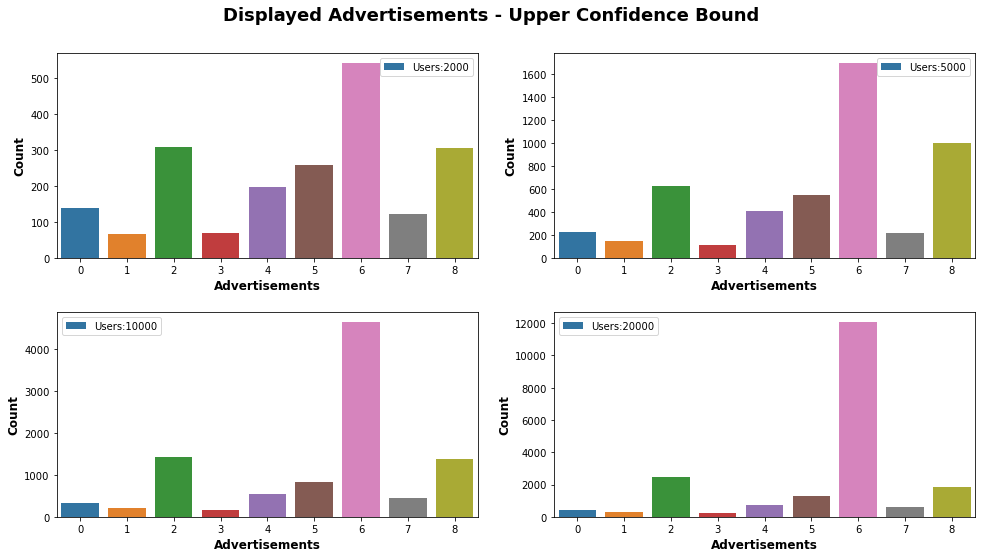

In [7]:
# As it can be observed, the model managed to identify clearly the Ad with the highest conversion rate at the first 10000
# samples, with good performance at the first 2000 & 5000 samples as well
fig,axs=plt.subplots(2,2,figsize=(14,8))
sns.countplot(data=df_selected_Ad_2000, x="Advertisements - Users:2000",label='Users:2000',ax=axs[0,0])
sns.countplot(data=df_selected_Ad_5000, x="Advertisements - Users:5000",label='Users:5000',ax=axs[0,1])
sns.countplot(data=df_selected_Ad_10000, x="Advertisements - Users:10000",label='Users:10000',ax=axs[1,0])
sns.countplot(data=df_selected_Ad_20000, x="Advertisements - Users:20000",label='Users:20000',ax=axs[1,1])
for ax in axs.flat:
    fig.suptitle("Displayed Advertisements - Upper Confidence Bound", fontweight='bold',fontsize=18)
    ax.set_xlabel('Advertisements',fontsize=12,fontweight='bold')
    ax.set_ylabel('Count',fontsize=12,fontweight='bold')
    ax.legend()
    ax.figure.tight_layout(pad=2);
    

## Thompson Sampling

In [8]:
#Thompson Sampling Algorithm
def TSampling_rewards(Users_Num):
    #Total Number of Advertisements
    Ad_Num=9
    #List of advertisements that are selected by the algorithm based on the user clicks at each step (initially empty)
    Ad_to_Display=[]
    # Count each time an advertisement gets reward=1
    Ad_Count_Reward_1=[0]*Ad_Num
    # Count each time an advertisement gets reward=0
    Ad_Count_Reward_0=[0]*Ad_Num
    # Total number of rewards  (initially zero)
    Ad_Total_Rewards=0
    
    for x in range(1,Users_Num+1):
        Ad=0
        draw_max=0
        for j in range(0,Ad_Num):
            draw_rndm=random.betavariate(Ad_Count_Reward_1[j]+1,Ad_Count_Reward_0[j]+1)
            if draw_rndm>draw_max:
                draw_max=draw_rndm
                Ad=j
                
        Ad_to_Display.append(Ad)
        Tsample_reward = data.values[x-1, Ad]
        if Tsample_reward == 1:
            Ad_Count_Reward_1[Ad]+= 1
        else:
            Ad_Count_Reward_0[Ad]+= 1
        Ad_Total_Rewards+= Tsample_reward
            
    
   
    return Ad_to_Display,Ad_Total_Rewards
        

In [9]:
# The algorithm is to be executed for different samples, whose number progressively increases, so as to observe how many
# samples were required for the model to be able to identify clearly the Ad with the highest conversion rate
select_Ad_2000=TSampling_rewards(Users_Num=2000)
select_Ad_5000=TSampling_rewards(Users_Num=5000)
select_Ad_10000=TSampling_rewards(Users_Num=10000)
select_Ad_20000=TSampling_rewards(Users_Num=20000)

In [10]:
# Conversion to pandas dataframe
df_select_Ad_2000=pd.DataFrame(data=select_Ad_2000[0],columns=['Advertisements - Users:2000'])
df_select_Ad_5000=pd.DataFrame(data=select_Ad_5000[0],columns=['Advertisements - Users:5000'])
df_select_Ad_10000=pd.DataFrame(data=select_Ad_10000[0],columns=['Advertisements - Users:10000'])
df_select_Ad_20000=pd.DataFrame(data=select_Ad_20000[0],columns=['Advertisements - Users:20000'])

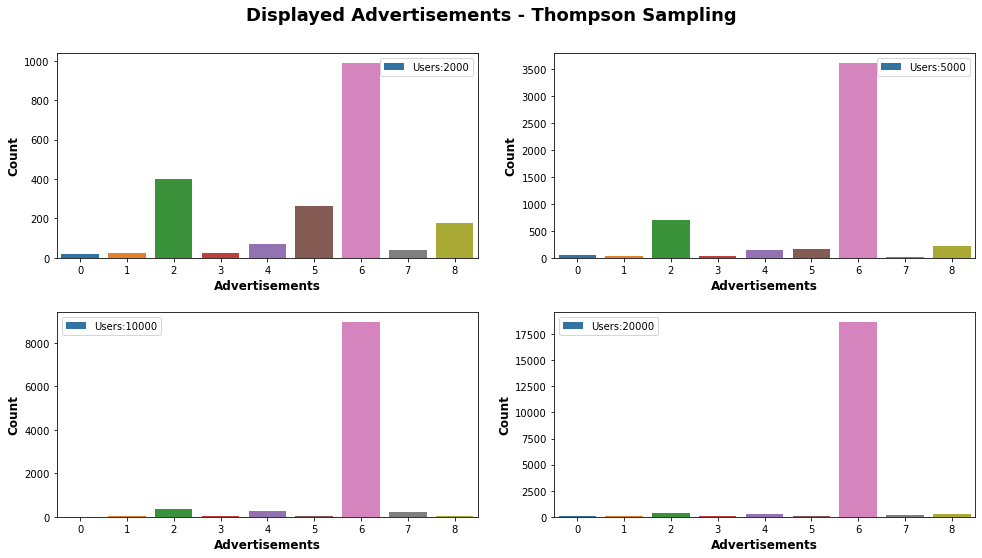

In [11]:
# As it can be observed, the Thompson Sampling algorithm managed to outperform UCB as it has clearly identified the Ad with
# the highest conversion rate at the first 5000 samples, with almost excellent performance at the first 2000 samples as well
fig,axs=plt.subplots(2,2,figsize=(14,8))
sns.countplot(data=df_select_Ad_2000, x="Advertisements - Users:2000",label='Users:2000',ax=axs[0,0])
sns.countplot(data=df_select_Ad_5000, x="Advertisements - Users:5000",label='Users:5000',ax=axs[0,1])
sns.countplot(data=df_select_Ad_10000, x="Advertisements - Users:10000",label='Users:10000',ax=axs[1,0])
sns.countplot(data=df_select_Ad_20000, x="Advertisements - Users:20000",label='Users:20000',ax=axs[1,1])

for ax in axs.flat:
    fig.suptitle("Displayed Advertisements - Thompson Sampling", fontweight='bold',fontsize=18)
    ax.set_xlabel('Advertisements',fontsize=12,fontweight='bold')
    ax.set_ylabel('Count',fontsize=12,fontweight='bold')
    ax.legend()
    ax.figure.tight_layout(pad=2);

In [12]:
# Total rewards for selected data samples

UCB_total_rewards2000=selected_Ad_2000[1]
UCB_total_rewards5000=selected_Ad_5000[1]
UCB_total_rewards10000=selected_Ad_10000[1]
UCB_total_rewards20000=selected_Ad_20000[1]
print('UCB Total Rewards 2000 samples: {}'.format(UCB_total_rewards2000))
print('UCB Total Rewards 5000 samples: {}'.format(UCB_total_rewards5000))
print('UCB Total Rewards 10000 samples: {}'.format(UCB_total_rewards10000))
print('UCB Total Rewards 20000 samples: {}'.format(UCB_total_rewards20000))
print('\r')
TSampling_total_rewards2000=select_Ad_2000[1]
TSampling_total_rewards5000=select_Ad_5000[1]
TSampling_total_rewards10000=select_Ad_10000[1]
TSampling_total_rewards20000=select_Ad_20000[1]
print('TSampling Total Rewards 2000 samples: {}'.format(TSampling_total_rewards2000))
print('TSampling Total Rewards 5000 samples: {}'.format(TSampling_total_rewards5000))
print('TSampling Total Rewards 10000 samples: {}'.format(TSampling_total_rewards10000))
print('TSampling Total Rewards 20000 samples: {}'.format(TSampling_total_rewards20000))

UCB Total Rewards 2000 samples: 1082
UCB Total Rewards 5000 samples: 2738
UCB Total Rewards 10000 samples: 5588
UCB Total Rewards 20000 samples: 11402

TSampling Total Rewards 2000 samples: 1148
TSampling Total Rewards 5000 samples: 2937
TSampling Total Rewards 10000 samples: 5904
TSampling Total Rewards 20000 samples: 11954
